### Import all the required libraries

In [1]:
!pip install ydata-profiling
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from ydata_profiling import ProfileReport
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
rcParams['figure.figsize'] = 10,6

### Import the dataset

In [5]:
df_price = pd.read_csv('houseprice.csv')
df_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


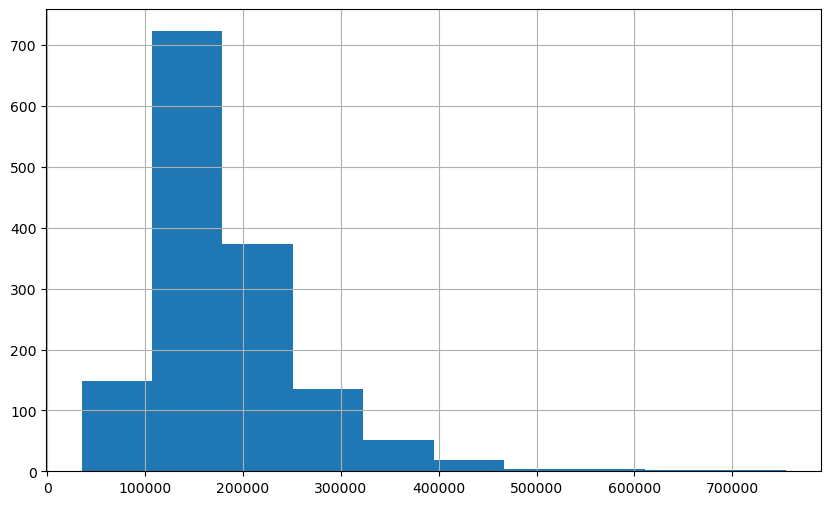

In [6]:
df_price['SalePrice'].hist()
plt.show()

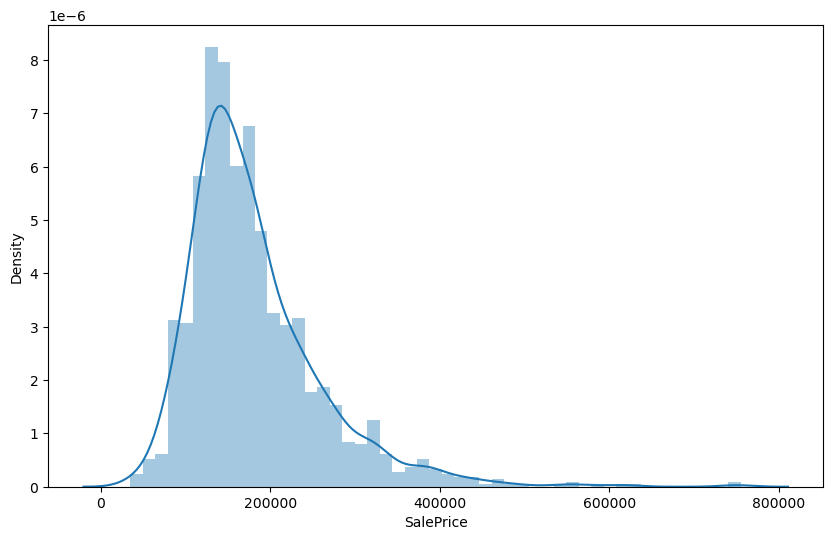

In [7]:
sns.distplot(df_price['SalePrice'])
plt.show()

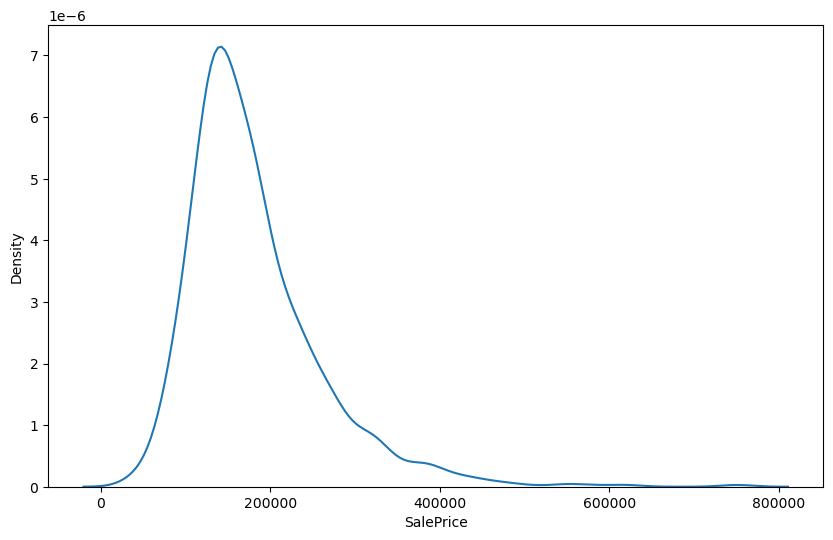

In [8]:
sns.kdeplot(df_price['SalePrice'])
plt.show()

In [9]:
df_price['SalePrice'].skew()
print("It is exhibiting positive skewness")

It is exhibiting positive skewness


In [10]:
df_price['SalePrice'].kurtosis() #Leptokurtic

# if kurtosis > 3 Leptokurtic
# if kurtosis==3 Mesokurtic
# if kurtosis < 3 Platykurtic

6.536281860064529

### Drop the unwanted columns

In [11]:
df_price.drop('Id', axis=1, inplace=True)

In [12]:
df_price.shape

(1460, 80)

### Convert datatype of the columns (if needed)

In [13]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
df_price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [15]:
# As these three columns are categorical columns but recognized as integer we are converting it to categorical column/object
columns = ['MSSubClass','OverallQual', 'OverallCond'] 

for col in columns:
    df_price[col] = df_price[col].astype('object')
    
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

### Splitting the variables into numerical and categorical

In [16]:
# Spliting the numerical columns from the dataset
df_num = df_price.select_dtypes(include=np.number)
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
# Dropping 'SalePrice' from the numerical columns as it is a dependent variable
df_num = df_num.drop('SalePrice', axis=1)

In [18]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [19]:
# Spliting the categorical columns from the dataset
df_cat = df_price.select_dtypes(exclude=np.number)
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Check for missing values

In [20]:
df_price.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [21]:
(df_price.isnull().sum()/df_price.index.size)*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [22]:
((df_price.isnull().sum()/df_price.index.size)*100)[((df_price.isnull().sum()/df_price.index.size)*100)>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [23]:
((df_price.isnull().sum()/df_price.index.size)*100)[((df_price.isnull().sum()/df_price.index.size)*100)>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [24]:
df_num.isnull().sum()[df_num.isnull().sum()>0]
# For numerical values we'll impute by missing values
df_num

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,500,349,0,0,0,0,0,0,2,2010
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,252,0,60,0,0,0,0,2500,5,2010
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,240,366,0,112,0,0,0,0,4,2010


In [25]:
df_cat.isnull().sum()[df_cat.isnull().sum()>0]
# For categorical values we treat it by mode values (most frequent values)

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [26]:
columns = list(df_num.columns)
columns

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

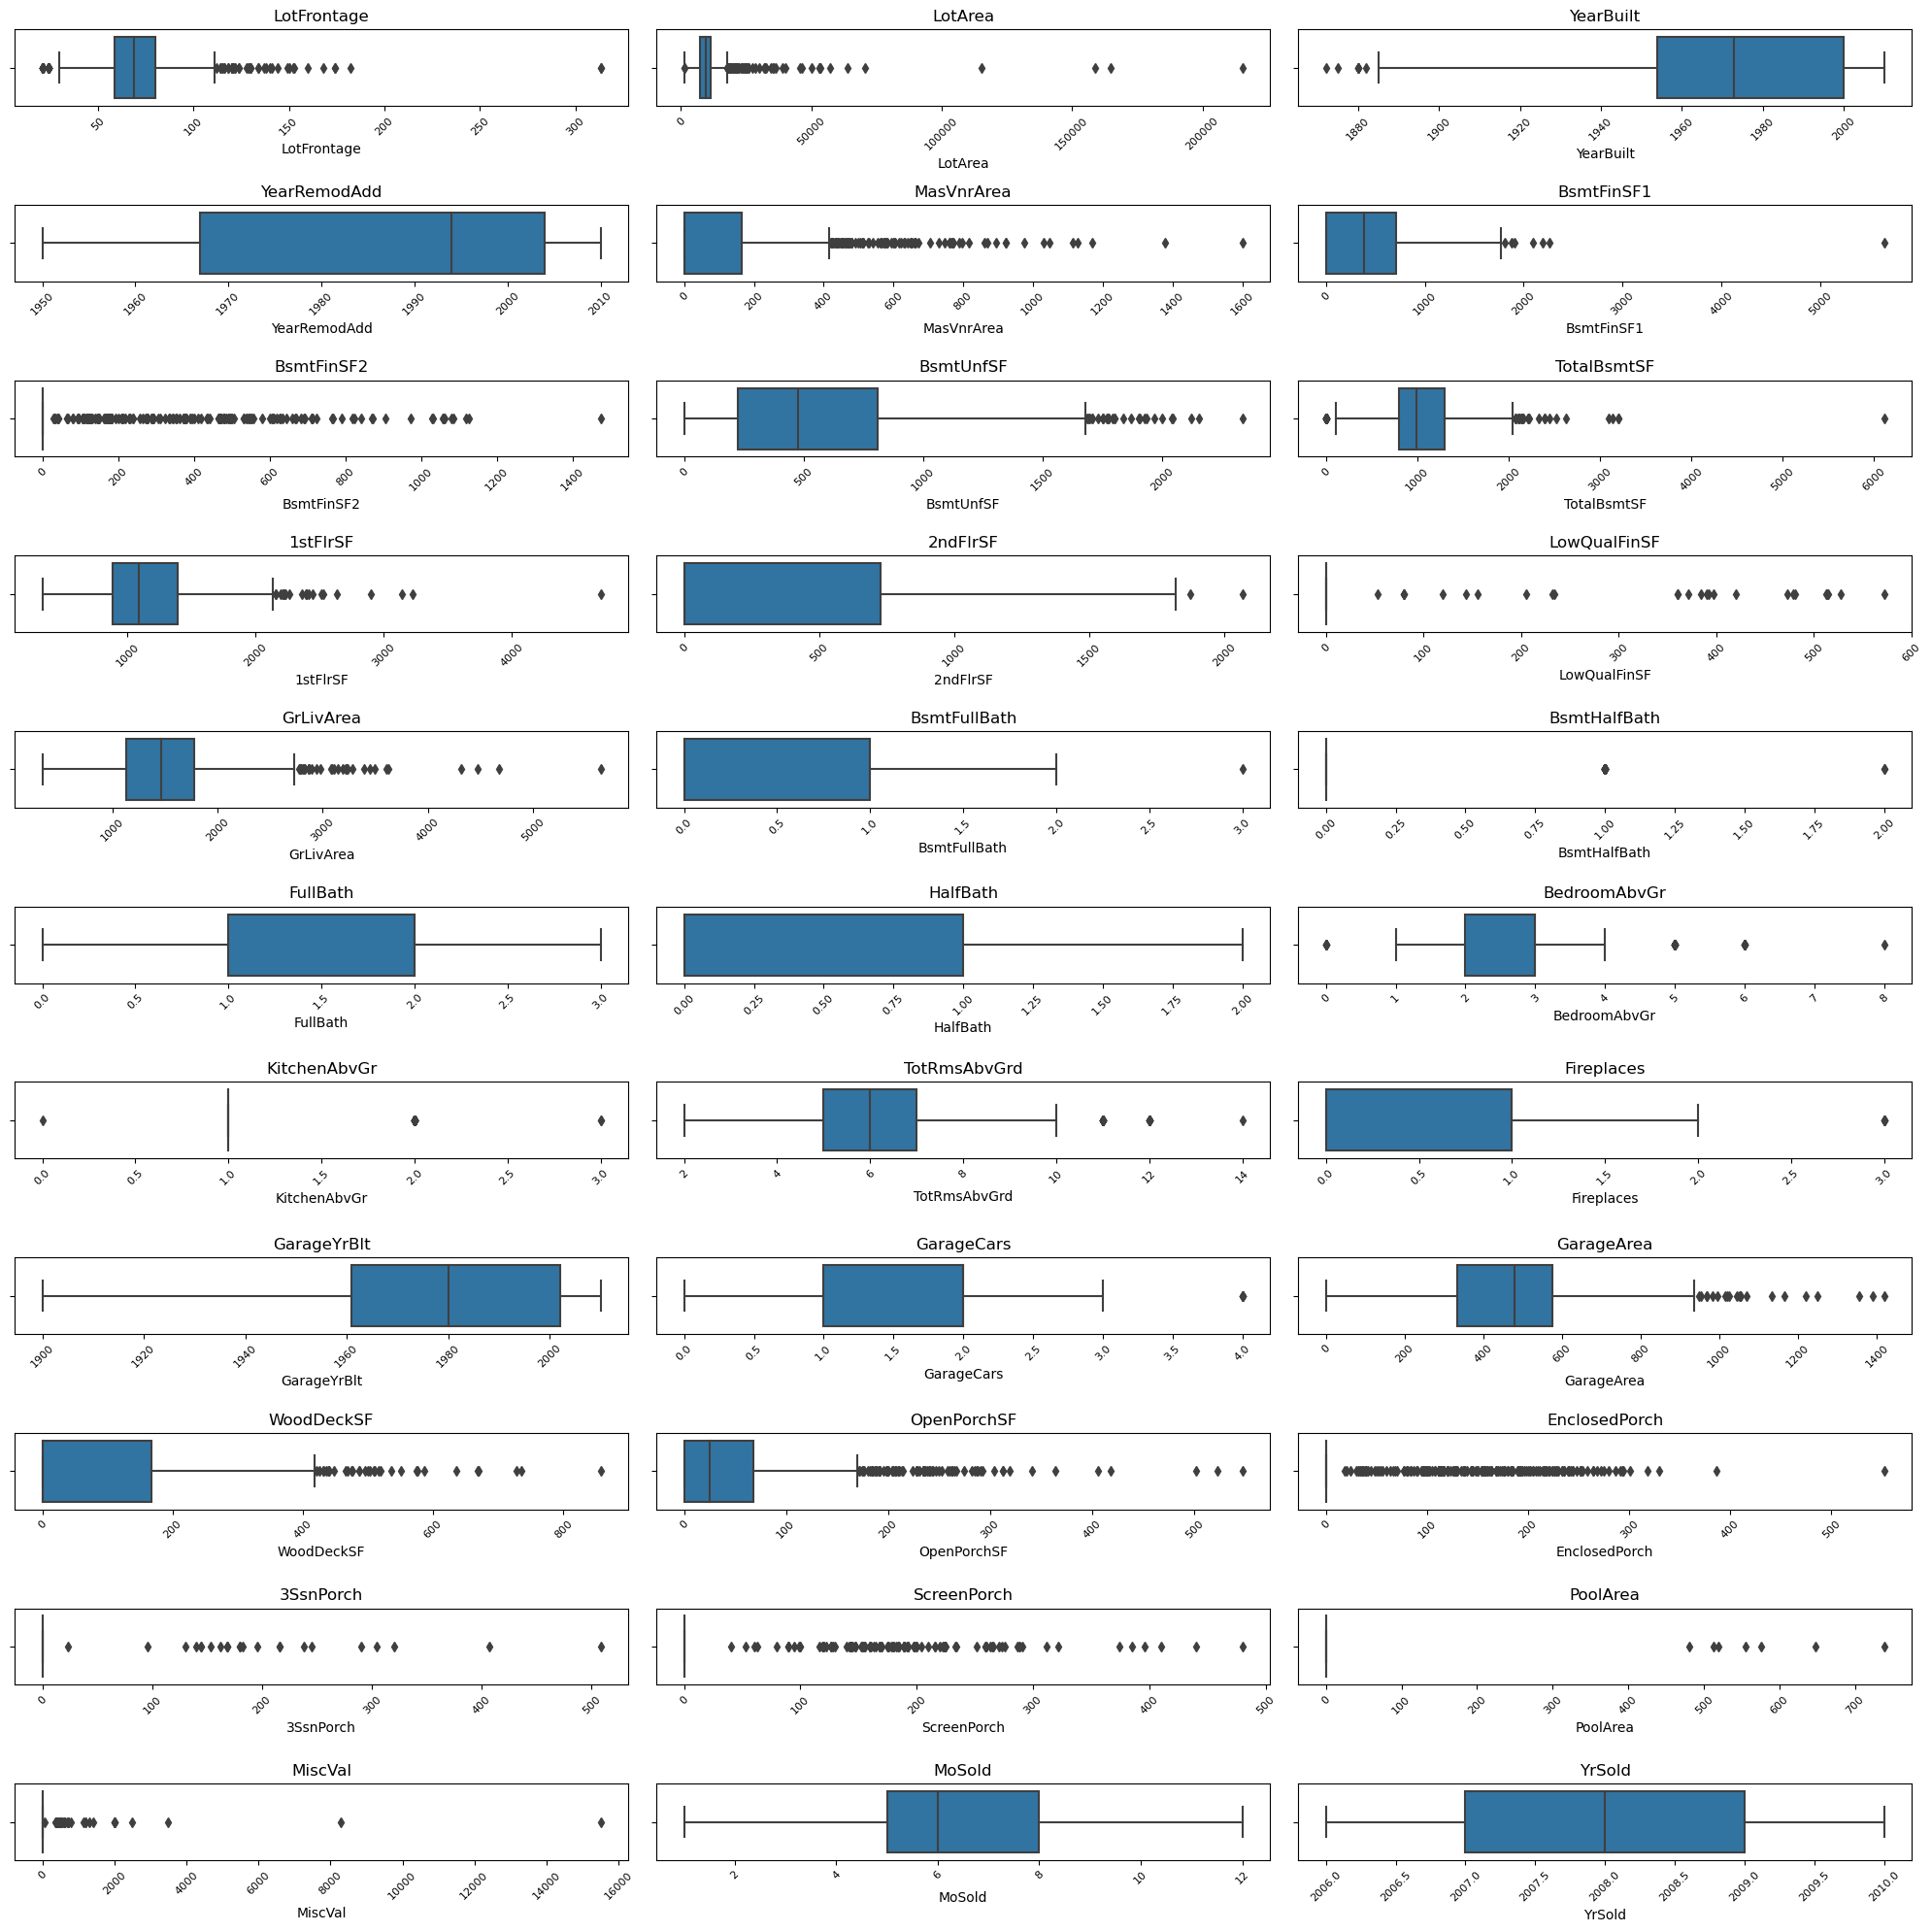

In [27]:
plt.rcParams['figure.figsize'] = 20,20
j = 1

for i in columns:
    plt.subplot(11, 3,j)
    sns.boxplot(x=df_num.loc[:,i])
    plt.title(i)
    j = j+1
    
    plt.xticks(rotation=45, fontsize=8)
    
plt.tight_layout()
plt.show()

### Missing Values Treatment

In [28]:
# Lets use KNN Imputers for treating missing values
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

In [29]:
df_num_sc = pd.DataFrame(knn_imputer.fit_transform(df_num), columns=df_num.columns)

In [30]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

In [31]:
df_cat['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [32]:
df_cat['MasVnrType'] = df_cat['MasVnrType'].replace("None", np.nan)
df_cat['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [33]:
# Imputing categorical variables
((df_cat.isnull().sum()/df_price.index.size)*100)[((df_cat.isnull().sum()/df_price.index.size)*100)>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64

In [34]:
# Instead of dropping the missing value columns replace it with 0 and where there is a value replace it with 1
df_cat['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [35]:
df_cat['PoolQC_ava'] = df_cat['PoolQC'].replace(np.nan, 0).replace('Gd', 1).replace('Ex',1).replace('Fa', 1)

In [36]:
df_cat['PoolQC_ava'].value_counts()

PoolQC_ava
0    1453
1       7
Name: count, dtype: int64

In [37]:
df_cat['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [38]:
df_cat['MiscFeature_ava'] = df_cat['MiscFeature'].replace(np.nan, 0).replace('Shed', 1).replace('Gar2',1).replace('Othr', 1).replace('TenC', 1)

In [39]:
df_cat['MiscFeature_ava'].value_counts()

MiscFeature_ava
0    1406
1      54
Name: count, dtype: int64

In [40]:
df_cat['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [41]:
df_cat['Alley_ava'] = df_cat['Alley'].replace(np.nan, 0).replace('Grvl', 1).replace('Pave',1)

In [42]:
df_cat['Alley_ava'].value_counts()

Alley_ava
0    1369
1      91
Name: count, dtype: int64

In [43]:
df_cat['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [44]:
df_cat['Fence_ava'] = df_cat['Fence'].replace(np.nan, 0).replace('MnPrv', 1).replace('GdPrv',1).replace('GdWo', 1).replace('MnWw', 1)

In [45]:
df_cat['Fence_ava'].value_counts()

Fence_ava
0    1179
1     281
Name: count, dtype: int64

In [46]:
df_cat['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [47]:
df_cat['MasVnrType_ava'] = df_cat['MasVnrType'].replace(np.nan, 0).replace('BrkFace', 1).replace('Stone',1).replace('BrkCmn', 1)

In [48]:
df_cat['MasVnrType_ava'].value_counts()

MasVnrType_ava
0    872
1    588
Name: count, dtype: int64

In [49]:
df_cat['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [50]:
df_cat['FireplaceQu_ava'] = df_cat['FireplaceQu'].replace(np.nan, 0).replace('Gd', 1).replace('TA',1).replace('Fa', 1).replace('Ex', 1).replace('Po',1)

In [51]:
df_cat['FireplaceQu_ava'].value_counts()

FireplaceQu_ava
1    770
0    690
Name: count, dtype: int64

In [52]:
df_cat.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'], axis=1, inplace=True)

In [53]:
((df_cat.isnull().sum()/df_price.index.size)*100)[((df_cat.isnull().sum()/df_price.index.size)*100)>0].sort_values(ascending=False)

GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
Electrical      0.068493
dtype: float64

In [54]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSSubClass       1460 non-null   object
 1   MSZoning         1460 non-null   object
 2   Street           1460 non-null   object
 3   LotShape         1460 non-null   object
 4   LandContour      1460 non-null   object
 5   Utilities        1460 non-null   object
 6   LotConfig        1460 non-null   object
 7   LandSlope        1460 non-null   object
 8   Neighborhood     1460 non-null   object
 9   Condition1       1460 non-null   object
 10  Condition2       1460 non-null   object
 11  BldgType         1460 non-null   object
 12  HouseStyle       1460 non-null   object
 13  OverallQual      1460 non-null   object
 14  OverallCond      1460 non-null   object
 15  RoofStyle        1460 non-null   object
 16  RoofMatl         1460 non-null   object
 17  Exterior1st      1460 non-null   

In [55]:
columns = ['PoolQC_ava','MiscFeature_ava', 'Alley_ava','Fence_ava','MasVnrType_ava','FireplaceQu_ava'] 

for col in columns:
    df_cat[col] = df_cat[col].astype('object')    

In [56]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSSubClass       1460 non-null   object
 1   MSZoning         1460 non-null   object
 2   Street           1460 non-null   object
 3   LotShape         1460 non-null   object
 4   LandContour      1460 non-null   object
 5   Utilities        1460 non-null   object
 6   LotConfig        1460 non-null   object
 7   LandSlope        1460 non-null   object
 8   Neighborhood     1460 non-null   object
 9   Condition1       1460 non-null   object
 10  Condition2       1460 non-null   object
 11  BldgType         1460 non-null   object
 12  HouseStyle       1460 non-null   object
 13  OverallQual      1460 non-null   object
 14  OverallCond      1460 non-null   object
 15  RoofStyle        1460 non-null   object
 16  RoofMatl         1460 non-null   object
 17  Exterior1st      1460 non-null   

In [57]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
simple_imputer = simple_imputer.fit(df_cat.iloc[:,:])

In [58]:
df_cat_trans = simple_imputer.transform(df_cat)

In [59]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

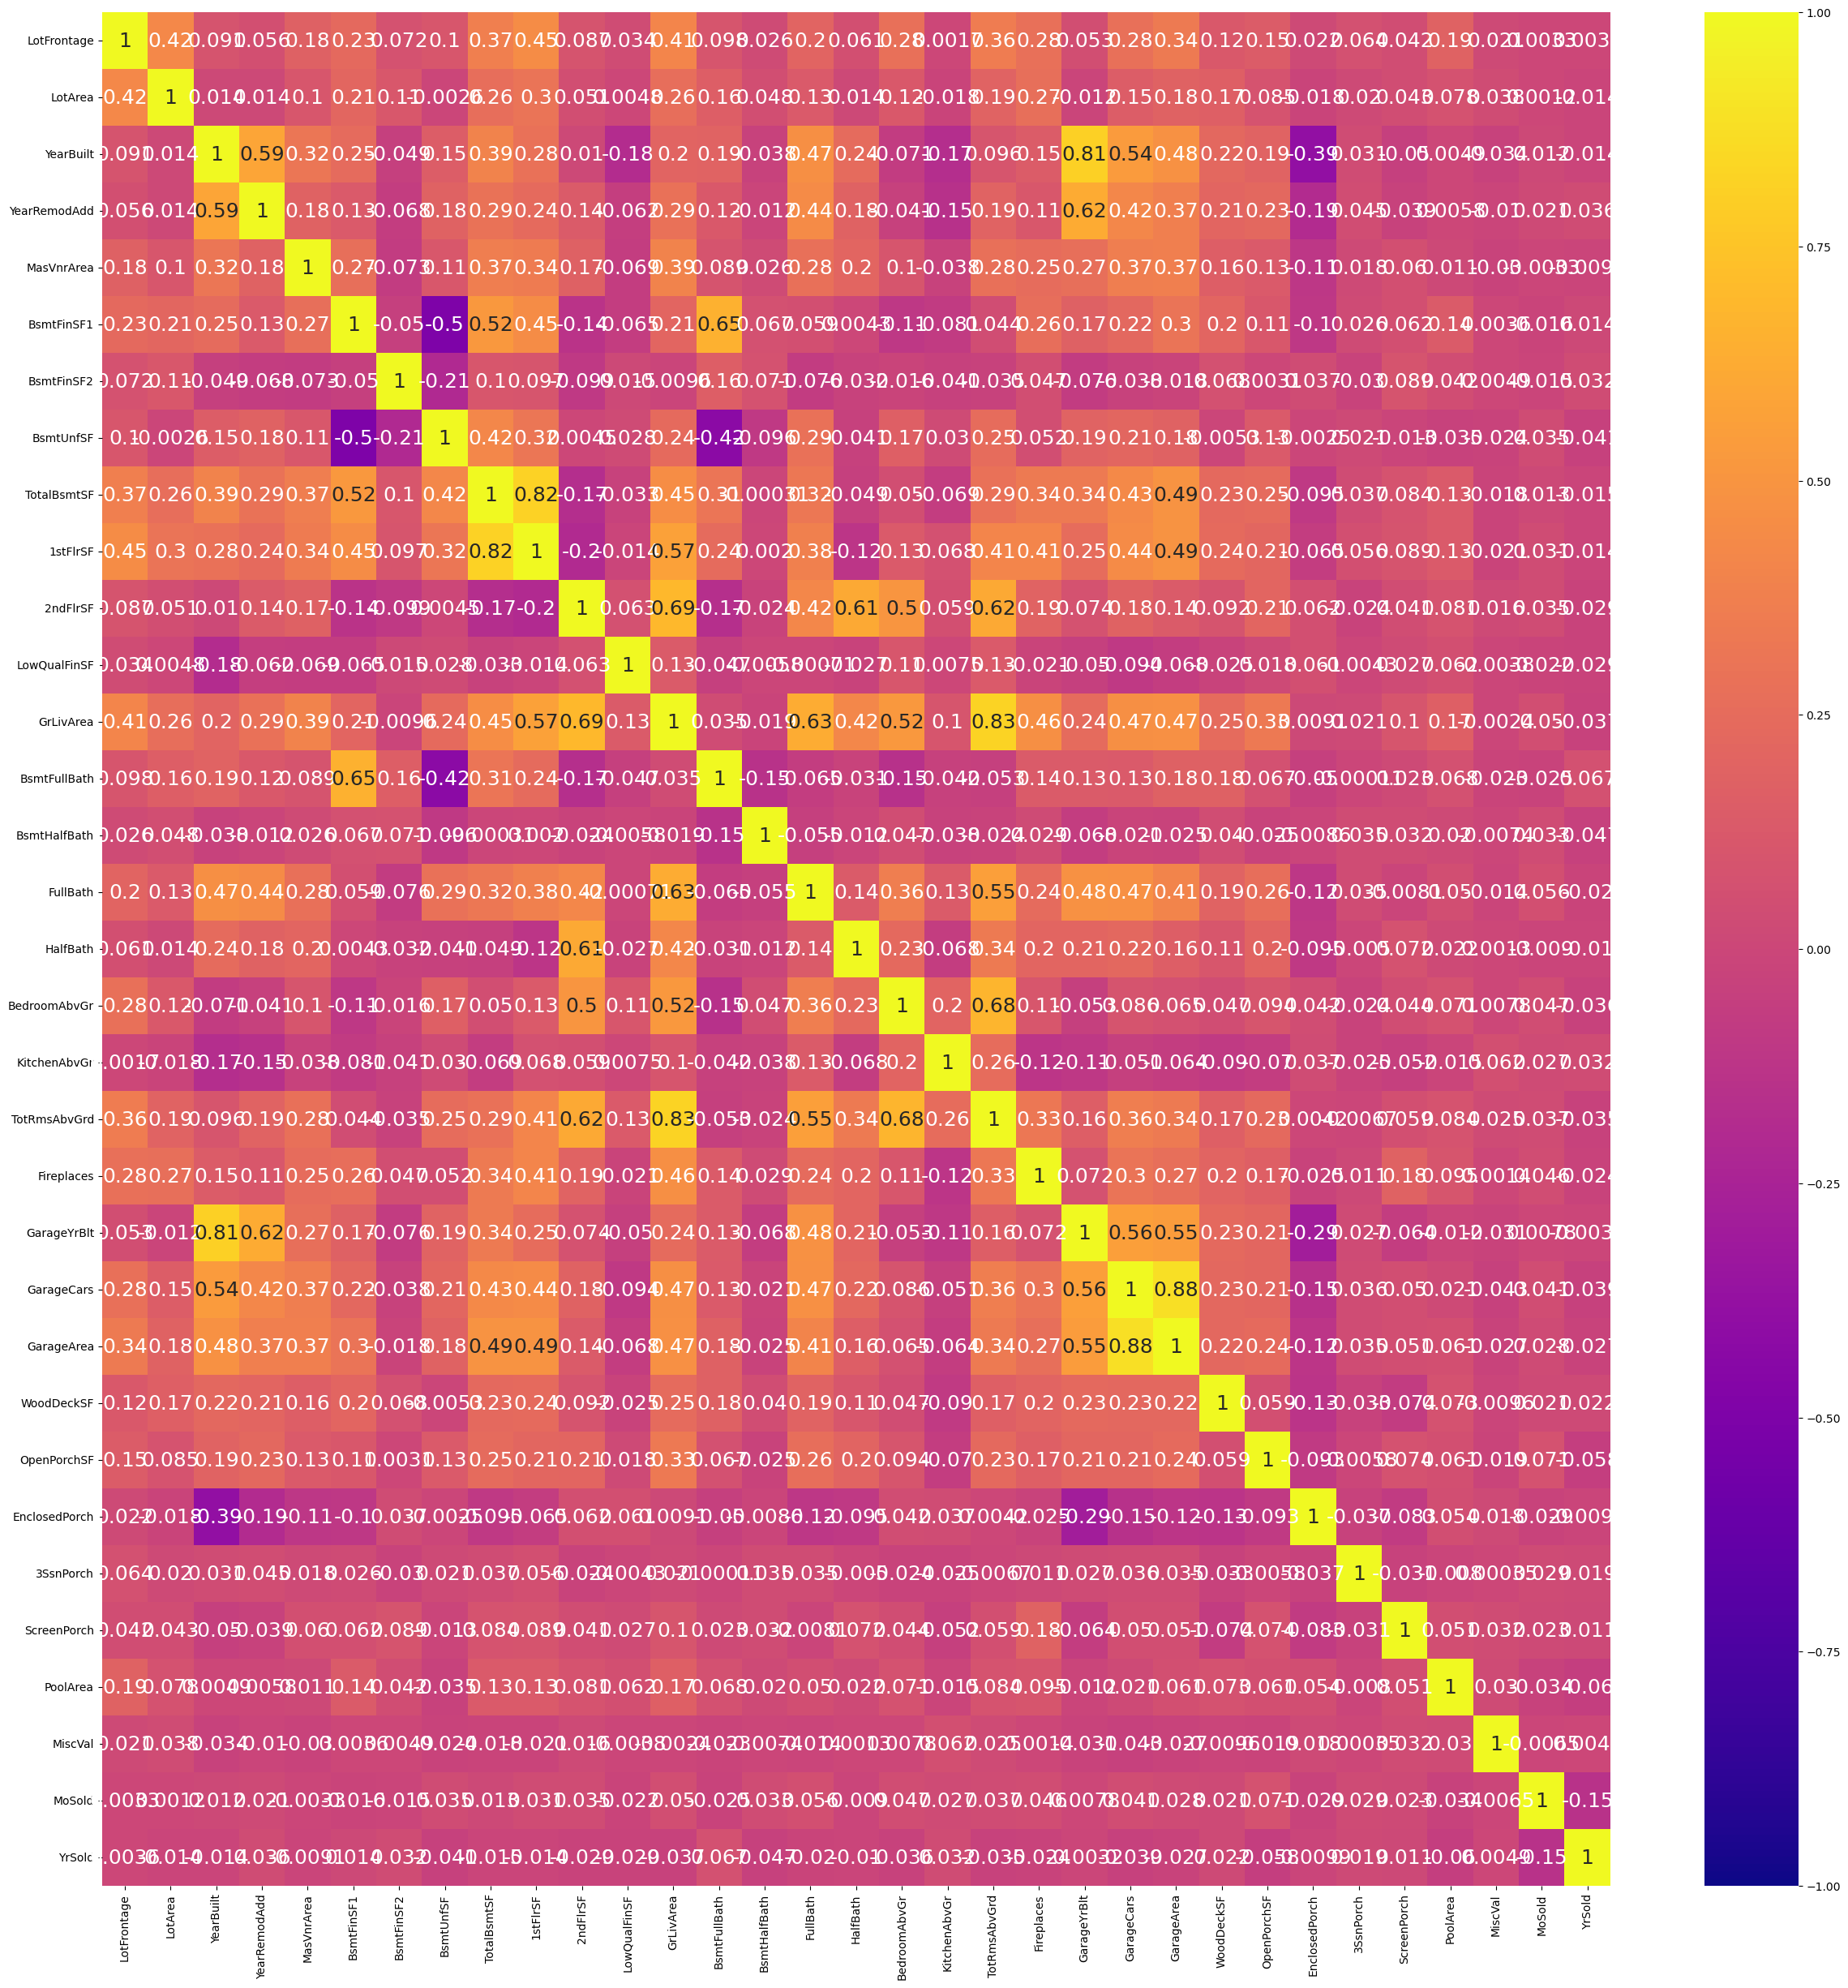

In [60]:
plt.figure(figsize=(30,30))

sns.heatmap(df_num_sc.corr(),
           cmap='plasma',
           vmax=1.0,
           vmin=-1.0,
           annot=True,
           annot_kws={'size':18})
plt.show()

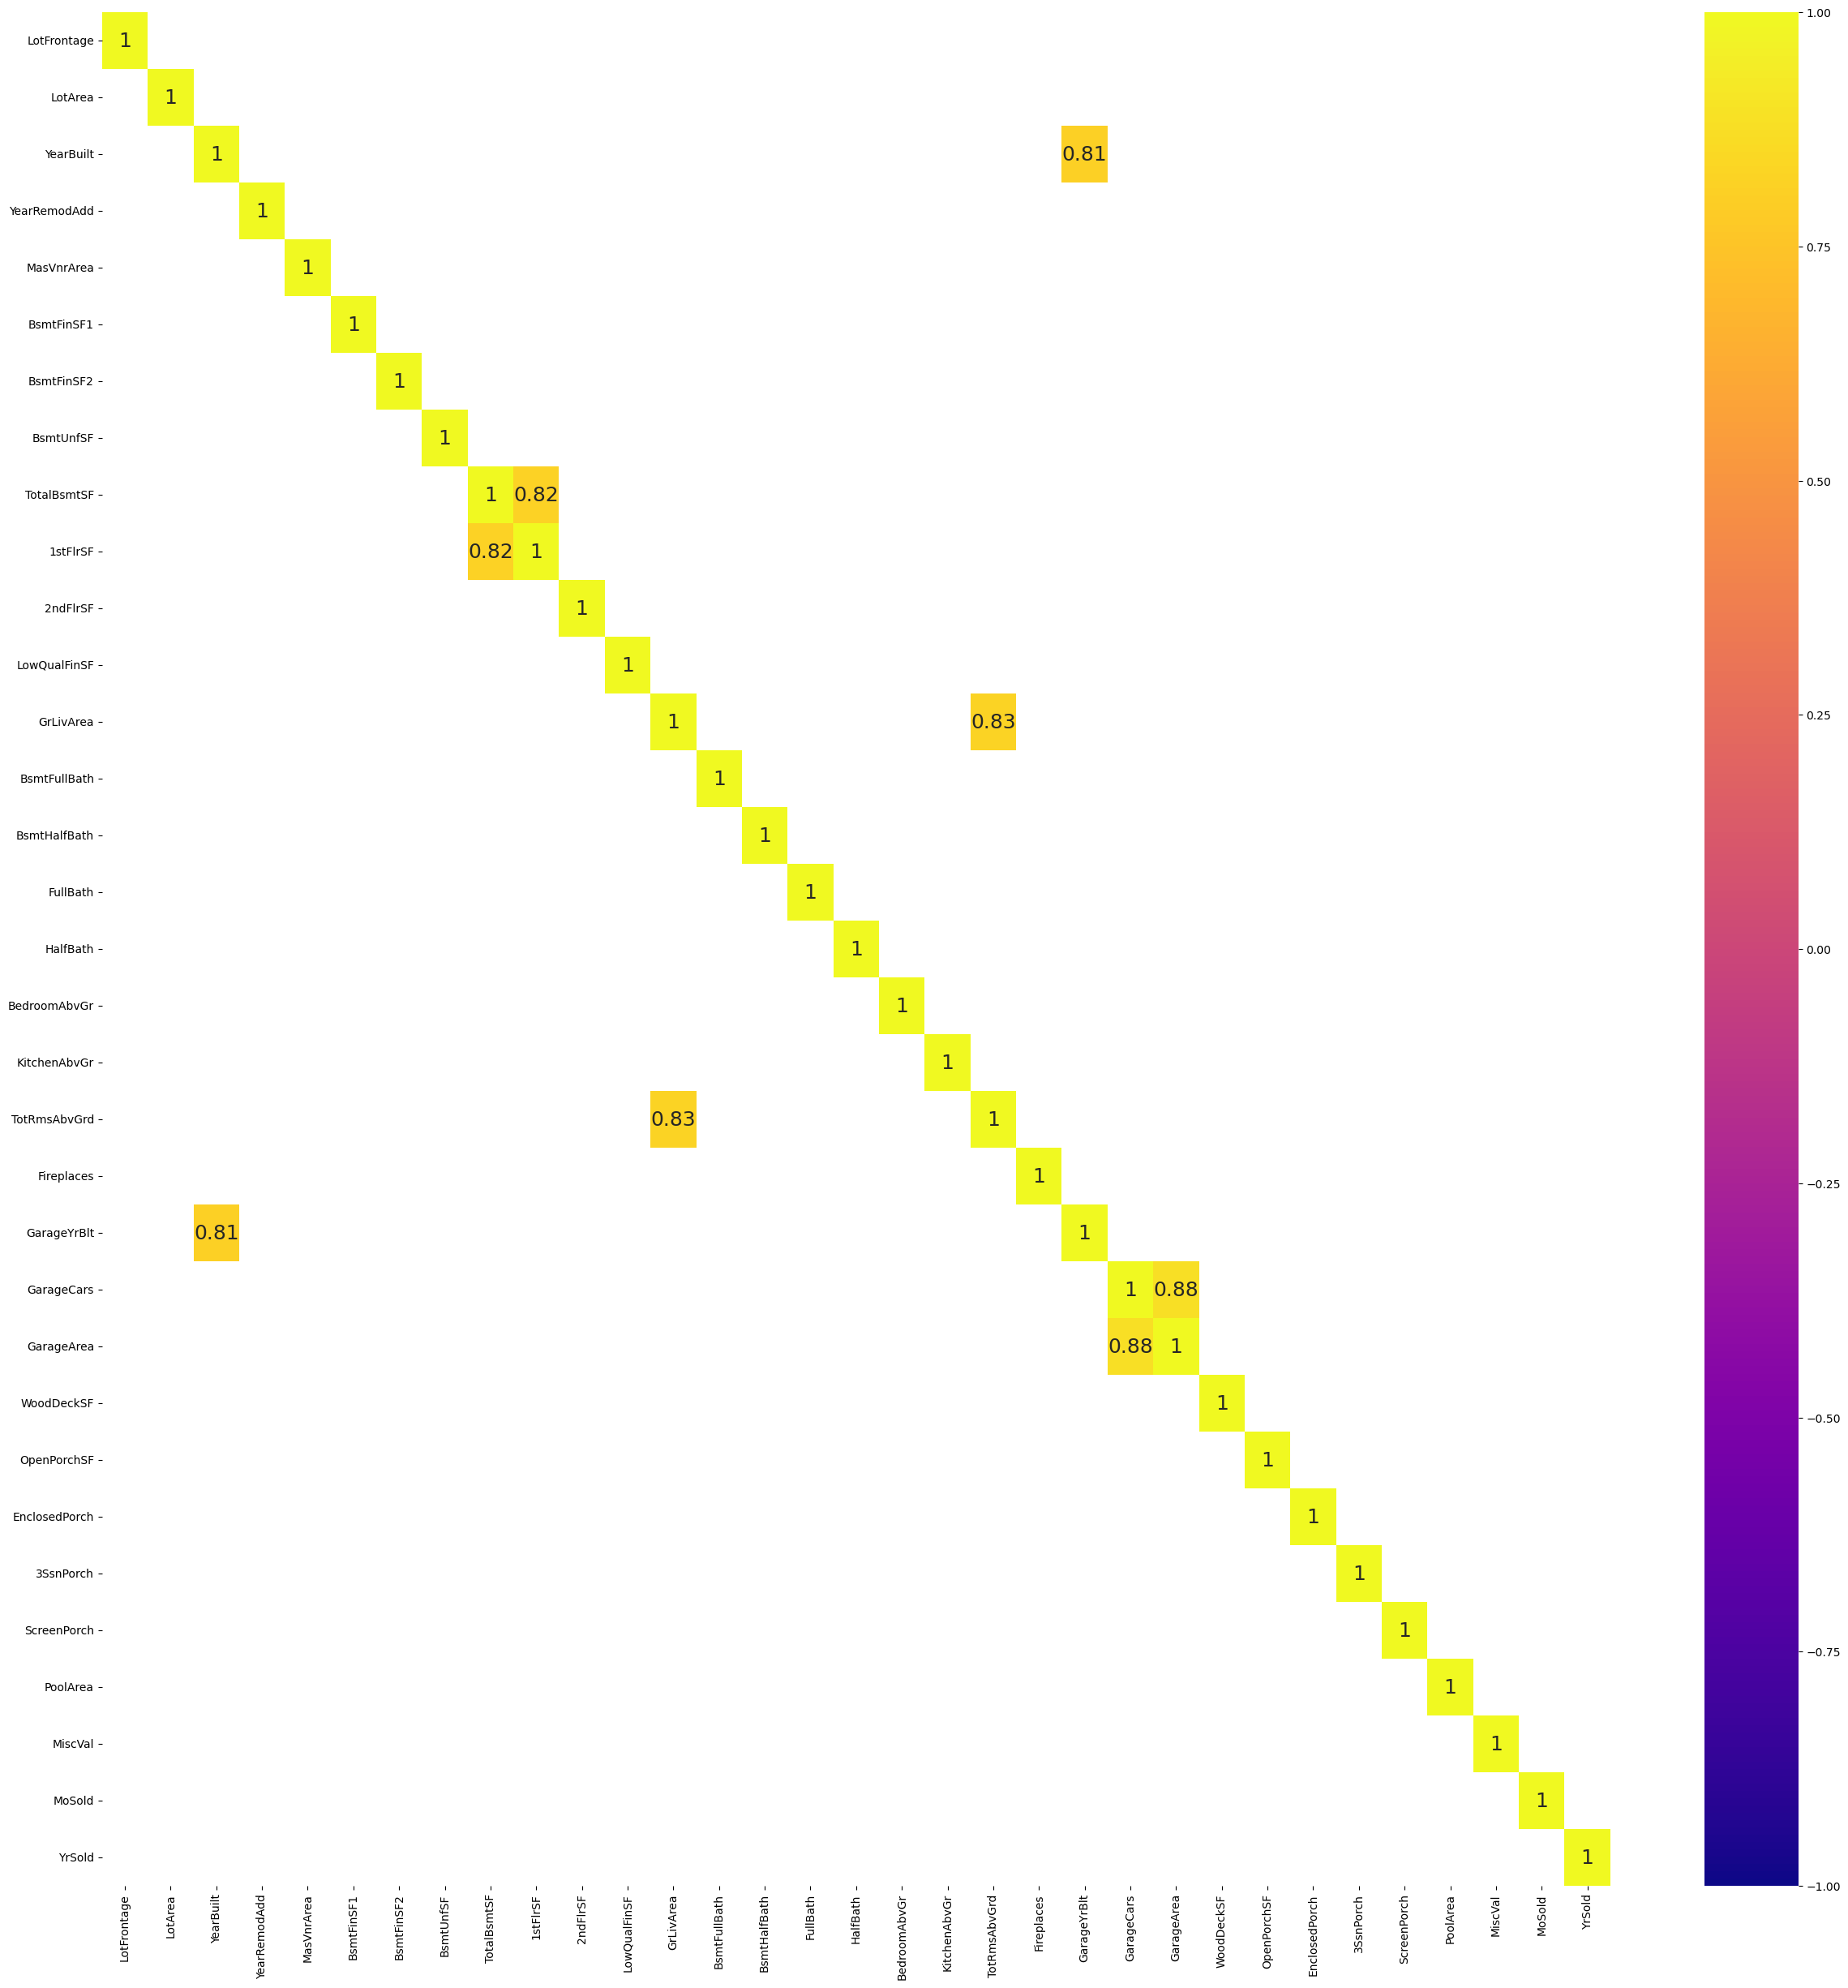

In [61]:
plt.figure(figsize=(30,30))

sns.heatmap(df_num_sc.corr()[(df_num_sc.corr()>=0.75) | (df_num_sc.corr() <= -0.75)],
           cmap='plasma',
           vmax=1.0,
           vmin=-1.0,
           annot=True,
           annot_kws={'size':18})
plt.show()

In [62]:
# profile = ProfileReport(df_num_sc)
# profile

### Encoding Techniques
1. One Hot Encoding | Dummy Encoding
2. Label Encoding
3. Ordinal Encoding
4. Binary Encoding
5. Target Encoding
6. Frequency Encoding
7. Hash Encoding

In [63]:
# Category_Encoders - Catboost encoders

# = (prior + sum avg of number of time this features (for that level)) / (total + 1)
# total_records = total number of rows
# prior = average of y variable

In [71]:
def cat_boost(cat_input, target):
    catboost = ce.cat_boost.CatBoostEncoder()
    catboost.fit(cat_input, target)
    df_encode = round(catboost.transform(cat_input),2)
    return df_encode

In [72]:
# target value has lot of skewness so we are doing transformation to that variable
df_target = np.log(df_price['SalePrice'])

In [73]:
df_cat_en = cat_boost(df_cat, df_target)

In [74]:
df_cat_en.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,MasVnrType_ava,FireplaceQu_ava
0,12.34,12.09,12.03,11.94,12.02,12.02,12.00,12.02,12.16,12.04,...,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,11.81
1,12.05,12.09,12.03,11.94,12.02,12.02,12.03,12.02,12.32,11.82,...,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.90,12.22
2,12.34,12.09,12.03,12.16,12.02,12.02,12.00,12.02,12.16,12.04,...,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,12.22
3,11.97,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.20,12.04,...,12.07,12.06,11.99,11.79,12.02,12.03,12.04,12.06,11.90,12.22
4,12.34,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.66,12.04,...,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,12.22


In [75]:
df_price_dataset = pd.concat([df_num_sc, df_cat_en], axis = 1)

In [76]:
df_price_dataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,MasVnrType_ava,FireplaceQu_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,11.81
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.90,12.22
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,12.22
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.07,12.06,11.99,11.79,12.02,12.03,12.04,12.06,11.90,12.22
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,12.22


### Check with Base Model
1. With Regression - Base models are linear Regression
2. With Classification - Base models are logistic Regression

In [78]:
X = df_price_dataset
y = df_target

In [79]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=0)

In [80]:
lr = LinearRegression()

model_lr = lr.fit(Xtrain, ytrain)
pred_train = model_lr.predict(Xtrain)
pred_test = model_lr.predict(Xtest)

In [81]:
r2_train = r2_score(ytrain, pred_train)
r2_test = r2_score(ytest, pred_test)

print("Train result is", r2_train)
print("Test result is", r2_test)

Train result is 0.9135689262539612
Test result is 0.8432151626275719


In [85]:
# Root Mean squared Error
print("RMSE Train:",np.sqrt(mean_squared_error(ytrain, pred_train)))
print("RMSE Test:",np.sqrt(mean_squared_error(ytest, pred_test)))

RMSE Train: 0.11816883426127833
RMSE Test: 0.15564383429898215


### Clustering - Does it work better

1. Clustering is applicable only for Numerical variables
2. Clustering requires scaling

In [90]:
sc = StandardScaler()

In [92]:
df_num_standarized = pd.DataFrame(sc.fit_transform(df_num_sc), columns=df_num_sc.columns)
df_num_standarized.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.250384,-0.207142,1.050994,0.878668,0.506062,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.381302,-0.091886,0.156734,-0.429577,-0.575300,1.171992,-0.288653,-0.641228,0.466465,0.257140,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-0.124047,0.073480,0.984752,0.830215,0.318479,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-0.460946,-0.096897,-1.863632,-0.720298,-0.575300,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.549751,0.375148,0.951632,0.733308,1.355703,0.463568,-0.288653,-0.174865,0.199680,-0.045611,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
